# Customer segmentation 

After running the PCA, the observations that are similar will fall close to each other. In addition, the multivariate outliers was removed to ensure the consistency of the data. I'm going to run the K-means model to segment the customers automatically.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans


In [2]:
data = pd.read_csv('pca_data')
data.head()


,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Complain,Response,Days,Marital,Spent,Family_Size,col1,col2,col3,col4
0,-0.891943,0.314569,-0.823719,-0.931161,0.311683,0.974178,1.548116,1.747883,2.448550,1.479812,...,-0.095695,2.370363,-1.973635,0.400582,1.678816,-1.760647,-2.960244,0.371219,3.414960,1.099925
1,-0.891943,-0.254830,1.038308,0.906152,-0.380005,-0.874842,-0.638885,-0.731930,-0.652580,-0.635617,...,-0.095695,-0.421876,1.664635,0.400582,-0.964140,0.447928,1.999956,-0.603942,-1.615439,-1.087780
2,-0.891943,0.965125,-0.823719,-0.931161,-0.795017,0.354875,0.567737,-0.176268,1.335792,-0.149312,...,-0.095695,-0.421876,0.172342,1.383749,0.280875,-0.656360,-1.959395,-0.351829,-0.325701,-0.009573
3,-0.891943,-1.205824,1.038308,-0.931161,-0.795017,-0.874842,-0.563471,-0.667638,-0.506644,-0.586987,...,-0.095695,-0.421876,1.922668,1.383749,-0.920922,0.447928,2.216570,-1.351857,-0.893556,-0.755276
4,0.571826,0.322052,1.038308,-0.931161,1.556721,-0.394808,0.416909,-0.217598,0.150066,-0.003420,...,-0.095695,-0.421876,0.821726,-0.582584,-0.307557,0.447928,0.423775,0.444275,-0.586913,0.840587


D:\conda\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


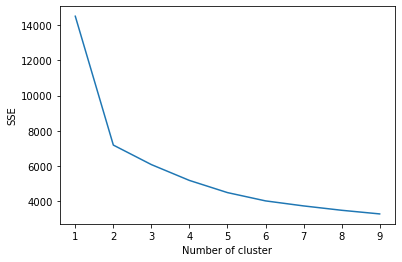

In [3]:
# The hyperparameter of K-means is the number of clusters. 
# Determine the number of clusters from the perspective of statistic
sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data[['col1','col2','col3','col4']])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


In [4]:
kmeans = KMeans(n_clusters=4)
km = kmeans.fit_predict(data[['col1','col2','col3','col4']])
data['clusters']=km
pca_data = data[['col1','col2','col3','col4','clusters']]
pca_data.head()

,col1,col2,col3,col4,clusters
0,-2.960244,0.371219,3.414960,1.099925,3
1,1.999956,-0.603942,-1.615439,-1.087780,2
2,-1.959395,-0.351829,-0.325701,-0.009573,1
3,2.216570,-1.351857,-0.893556,-0.755276,2
4,0.423775,0.444275,-0.586913,0.840587,2


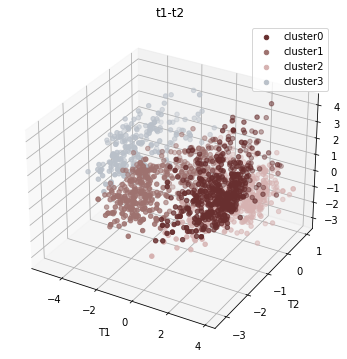

In [5]:
x=data['col1']
y=data['col2']
z=data['col3']
fig = plt.figure(figsize=(9,6))
ax = plt.subplot(111, projection='3d', label="bla")
color = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]

# ax = fig.add_subplot(111,projection='3d')
x1 = x[pca_data['clusters']==0]
x2 = x[pca_data['clusters']==1]
x3 = x[pca_data['clusters']==2]
x4 = x[pca_data['clusters']==3]

y1 = y[pca_data['clusters']==0]
y2 = y[pca_data['clusters']==1]
y3 = y[pca_data['clusters']==2]
y4 = y[pca_data['clusters']==3]

z1 = z[pca_data['clusters']==0]
z2 = z[pca_data['clusters']==1]
z3 = z[pca_data['clusters']==2]
z4 = z[pca_data['clusters']==3]

ax.scatter(x1,y1,z1, c=color[0],label='cluster0')
ax.scatter(x2,y2,z2, c=color[1],label='cluster1')
ax.scatter(x3,y3,z3, c=color[2],label='cluster2')
ax.scatter(x4,y4,z4, c=color[3],label='cluster3')

ax.set_title('t1-t2')
ax.set_xlabel('T1')
ax.set_ylabel('T2')
plt.legend()

# Population of each segment

<AxesSubplot:xlabel='clusters', ylabel='count'>

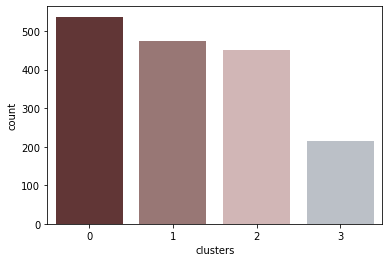

In [6]:
sns.countplot(x=pca_data['clusters'],palette=color)


# Purchasing pattern analysis

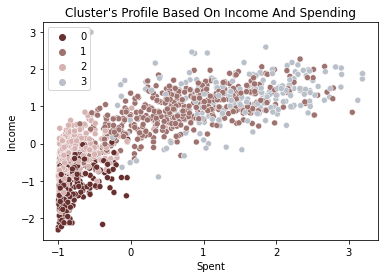

In [7]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["clusters"], palette= color[:4])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

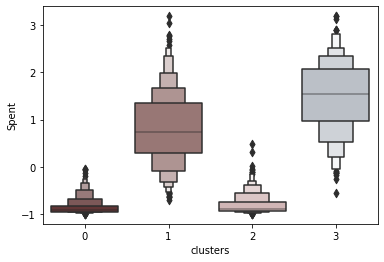

In [8]:
plt.figure()
# pl=sns.swarmplot(x=data["clusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["clusters"], y=data["Spent"], palette=color[:4])
plt.show()

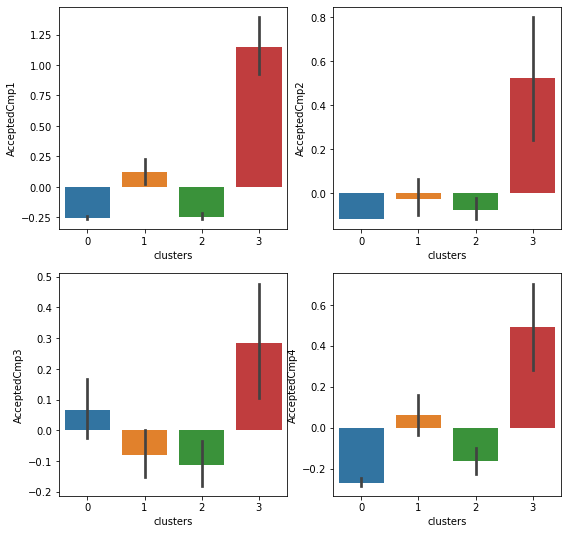

In [9]:
#I'd like to investigate how each segment response to different marketing campagin
plt.figure(figsize=(9,9))
plt.subplot(2,2,1)
sns.barplot(x=data['clusters'],y=data['AcceptedCmp1'])
plt.subplot(2,2,2)
sns.barplot(x=data['clusters'],y=data['AcceptedCmp2'])
plt.subplot(2,2,3)
sns.barplot(x=data['clusters'],y=data['AcceptedCmp3'])
plt.subplot(2,2,4)
sns.barplot(x=data['clusters'],y=data['AcceptedCmp4'])
plt.show()

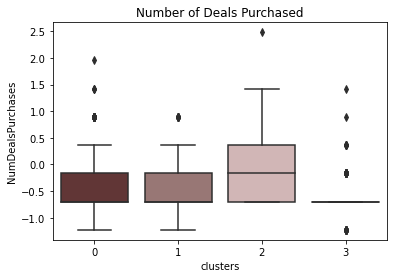

In [10]:
#number of deals purchased
plt.figure()
pl=sns.boxplot(y=data["NumDealsPurchases"],x=data["clusters"], palette= color)
pl.set_title("Number of Deals Purchased")
plt.show()
#it's not normal distributed. 

In [11]:
data.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Days', 'Marital', 'Spent',
       'Family_Size', 'col1', 'col2', 'col3', 'col4', 'clusters'],
      dtype='object')

<AxesSubplot:xlabel='clusters', ylabel='MntGoldProds'>

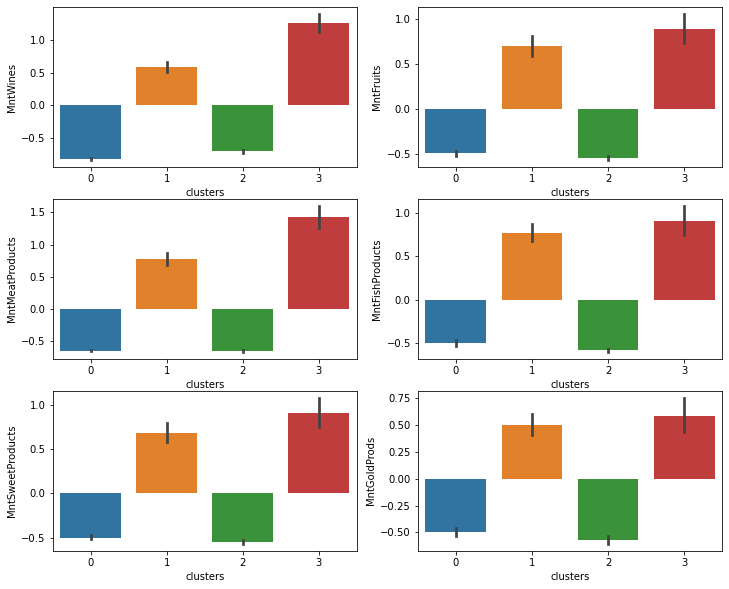

In [12]:
plt.figure(figsize=(12,10))
plt.subplot(3,2,1)
sns.barplot(x=data['clusters'],y=data['MntWines'])
plt.subplot(3,2,2)
sns.barplot(x=data['clusters'],y=data['MntFruits'])
plt.subplot(3,2,3)
sns.barplot(x=data['clusters'],y=data['MntMeatProducts'])
plt.subplot(3,2,4)
sns.barplot(x=data['clusters'],y=data['MntFishProducts'])
plt.subplot(3,2,5)
sns.barplot(x=data['clusters'],y=data['MntSweetProducts'])
plt.subplot(3,2,6)
sns.barplot(x=data['clusters'],y=data['MntGoldProds'])

In [16]:
initial_data = pd.read_csv("marketing_campaign.csv")
initial_data['cluster'] = data['clusters']

# Customer profile

In [13]:
print(data.columns)

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Days', 'Marital', 'Spent',
       'Family_Size', 'col1', 'col2', 'col3', 'col4', 'clusters'],
      dtype='object')


<AxesSubplot:xlabel='col1', ylabel='col2'>

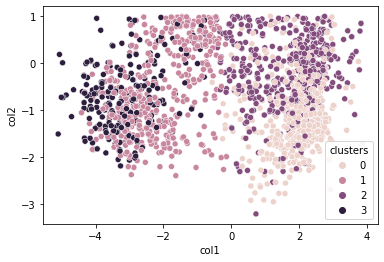

In [14]:
# sns.scatterplot(x=x,y=y,c=data['clusters'])
sns.scatterplot(x=data['col1'],y=data['col2'],hue=data['clusters'])


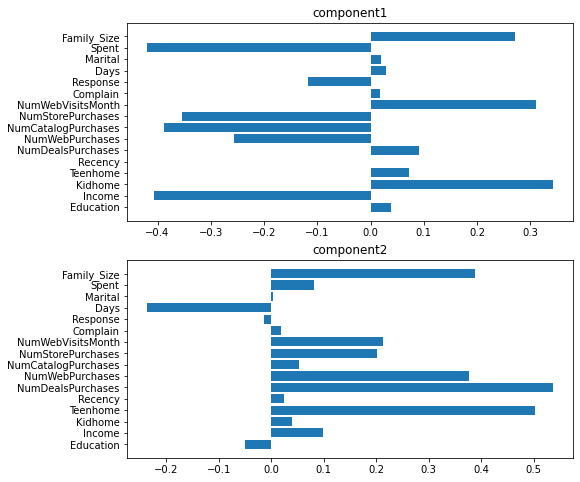

In [15]:
pca_com = pd.read_csv('pca_com')
fig = plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.barh(pca_com['0'],pca_com['com1'])
plt.title('component1')
plt.subplot(2,1,2)
plt.barh(pca_com['0'],pca_com['com2'])
plt.title('component2')
plt.show()
